In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import random as rn
from sklearn import preprocessing
train=pd.read_csv("/home/chiku/lon/train.csv")
test=pd.read_csv("/home/chiku/lon/testp.csv")
tr=pd.DataFrame(preprocessing.normalize(train.iloc[:,0:5]))
x_train=tr.iloc[:,0:4]
y_train=tr.iloc[:,-1]
one1=np.ones([x_train.shape[0],1])
x_train.insert(loc=0,column='x0',value=one1)
te=pd.DataFrame(preprocessing.normalize(test.iloc[:,0:5]))
x_test=te.iloc[:,0:4]
y_test=te.iloc[:,-1]
one2=np.ones([x_test.shape[0],1])
x_test.insert(loc=0,column='x0',value=one2)

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
poly2=PolynomialFeatures(degree=2)
x_train1=pd.DataFrame(poly2.fit_transform(x_train))

In [6]:
x_train1.shape

(299, 21)

In [12]:
x_test1=pd.DataFrame(poly2.fit_transform(x_test))

In [14]:
x_test1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,0.007714,0.036275,0.900267,0.079544,1.0,0.007714,0.036275,0.900267,...,0.000060,0.000280,0.006945,0.000614,0.001316,0.032658,0.002886,0.810481,0.071611,0.006327
1,1.0,1.0,0.009412,0.033517,0.901441,0.089299,1.0,0.009412,0.033517,0.901441,...,0.000089,0.000315,0.008484,0.000840,0.001123,0.030214,0.002993,0.812595,0.080498,0.007974
2,1.0,1.0,0.007035,0.036432,0.899746,0.069351,1.0,0.007035,0.036432,0.899746,...,0.000049,0.000256,0.006329,0.000488,0.001327,0.032779,0.002527,0.809544,0.062398,0.004810
3,1.0,1.0,0.020083,0.040554,0.912179,0.046474,1.0,0.020083,0.040554,0.912179,...,0.000403,0.000814,0.018320,0.000933,0.001645,0.036993,0.001885,0.832071,0.042393,0.002160
4,1.0,1.0,0.008061,0.032297,0.903195,0.052236,1.0,0.008061,0.032297,0.903195,...,0.000065,0.000260,0.007281,0.000421,0.001043,0.029171,0.001687,0.815762,0.047179,0.002729


In [15]:
def hyp(theta,x):
    p=x.dot(theta)
    return p

In [18]:
def cost(theta,x,y):
    m=len(x)
    ct=(1/2*m)*(np.sum((x.dot(theta)-y)**2))
    return ct

In [19]:
def multireg(x,y,alpha,iternum):
    theta=np.zeros(x.shape[1])
    m=x.shape[0]
    cos=[]
    tmp=theta
    for i in range(iternum):
        y_pre=hyp(theta,x)
        grad=(np.dot(x.T,(y_pre-y))*(1/m))
        tmp =theta-alpha*grad
        theta=tmp
        cos.append(cost(theta,x,y))
    return theta,cos

In [20]:
A,B=multireg(x_train,y_train,0.02,200)

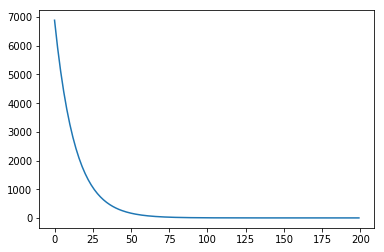

In [21]:
plt.plot(B)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,hyp(A,x_test)))
rms

0.012907613981647656